#  Clustering


1. Unsupervised machine learning
2. Main goal in clustering is categorise simlar data togethor



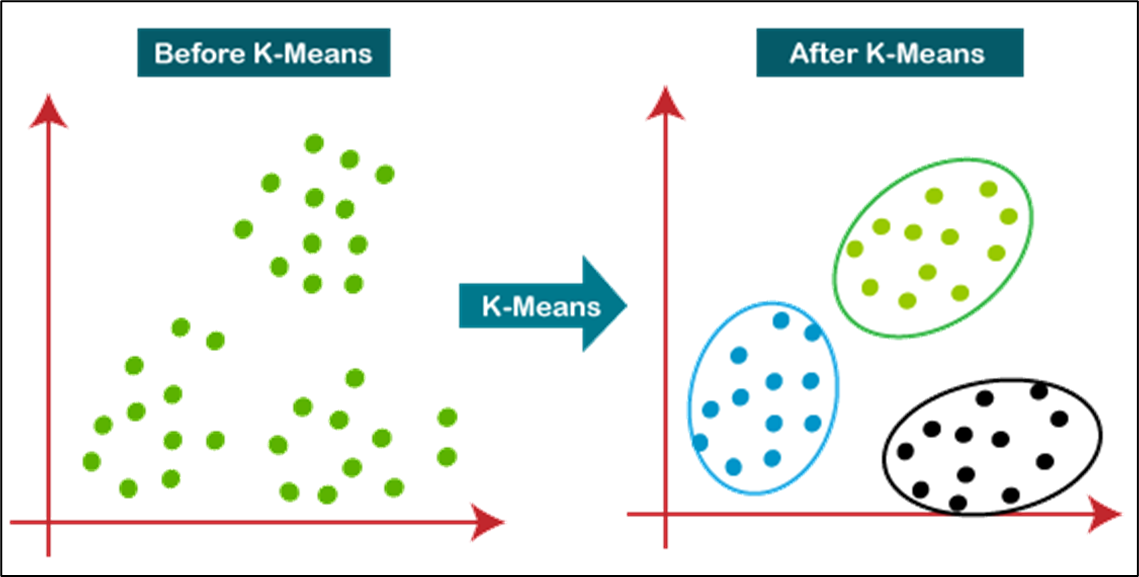

In [2]:
from warnings import filterwarnings

filterwarnings("ignore")

## if vs code is not performing auto completion

1.Open command pallete with Ctrl + Shift + P
2.Search Restart > Select Python Restart Language Server


## Step 1 - Data Ingestion

In [3]:
import pandas as pd

df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Income,Spending
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Categorize similar customers based on Income And Spending


## Step 2 - Perform basic data quality checks

In [4]:
df.duplicated().sum()

np.int64(0)

In [5]:
df.isna().sum()

CustomerID    0
Gender        0
Age           0
Income        0
Spending      0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  200 non-null    int64 
 1   Gender      200 non-null    object
 2   Age         200 non-null    int64 
 3   Income      200 non-null    int64 
 4   Spending    200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


## Step 3 - Visualize scatterplot for Income and Spending

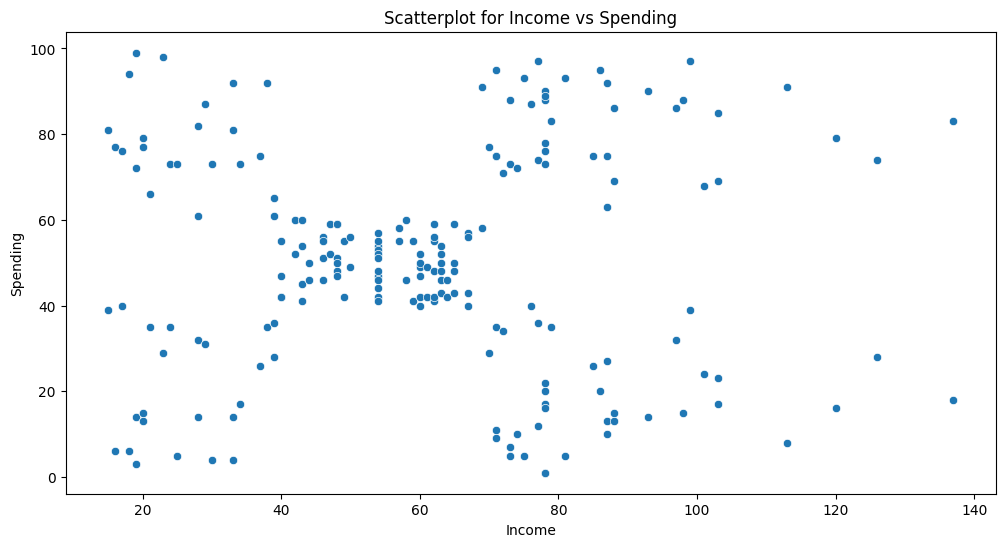

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x="Income", y="Spending")
plt.title("Scatterplot for Income vs Spending")
plt.show()

## Step 4 - Seperate X(Income, Spending)

In [8]:
X = df[["Income", "Spending"]]
X.head()

,Income,Spending
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


## Step 5 - Apply preprocessing on X

In [9]:
X.dtypes

Income      int64
Spending    int64
dtype: object

In [10]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [11]:
num_pipe = make_pipeline(SimpleImputer(strategy="median"), StandardScaler()).set_output(
    transform="pandas"
)

In [12]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,Income,Spending
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


In [13]:
num_pipe

,steps,"[('simpleimputer', ...), ('standardscaler', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,copy,True


## Step 6 - Calculate optimum number of clusters using elbow method

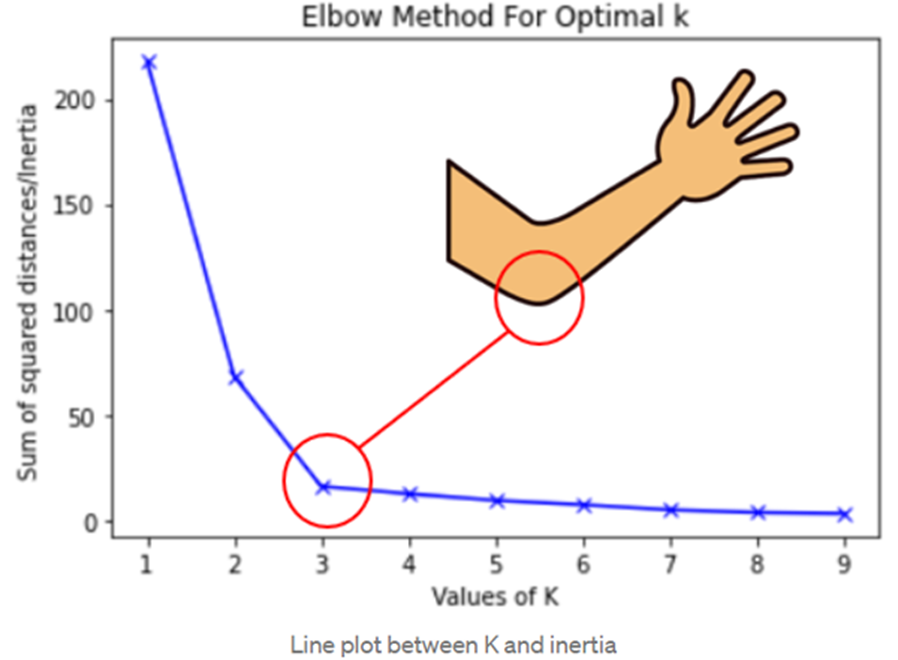

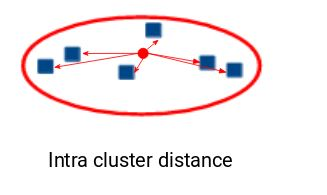

In [14]:
!uv add kneed

Resolved 56 packages in 5.11s
Prepared 1 package in 602ms
         If the cache and target directories are on different filesystems, hardlinking may not be supported.
         If this is intentional, set `export UV_LINK_MODE=copy` or use `--link-mode=copy` to suppress this warning.
Installed 1 package in 14ms
 + kneed==0.8.5


In [15]:
from sklearn.cluster import KMeans
from kneed import KneeLocator

In [16]:
list(range(1, 15))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

In [17]:
# Set the k values
K = range(1, 15)
# Initialize inertias blank list
inertias = []

# Apply for loop on K
for i in K:
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(X_pre)
    a = km.inertia_
    print(f"Clusters (k) : {i}, Inertia : {a:.2f}")
    inertias.append(a)

Clusters (k) : 1, Inertia : 400.00
Clusters (k) : 2, Inertia : 273.67
Clusters (k) : 3, Inertia : 157.70
Clusters (k) : 4, Inertia : 109.23
Clusters (k) : 5, Inertia : 65.57
Clusters (k) : 6, Inertia : 60.13
Clusters (k) : 7, Inertia : 49.67
Clusters (k) : 8, Inertia : 37.32
Clusters (k) : 9, Inertia : 32.50
Clusters (k) : 10, Inertia : 30.06
Clusters (k) : 11, Inertia : 26.76
Clusters (k) : 12, Inertia : 26.23
Clusters (k) : 13, Inertia : 23.19
Clusters (k) : 14, Inertia : 21.20


In [18]:
knee = KneeLocator(K, inertias, curve="convex", direction="decreasing")
best_k = knee.elbow
print(f"Best K value : {best_k}")

Best K value : 5


In [19]:
inertias

[400.0,
 273.66888662642015,
 157.70400815035947,
 109.22822707921347,
 65.56840815571681,
 60.13287487193422,
 49.66824483736798,
 37.319122878338824,
 32.49508119910091,
 30.05932269404221,
 26.76120176636121,
 26.23289376978684,
 23.1935534219784,
 21.195257238649535]

## Plot the elbow curve

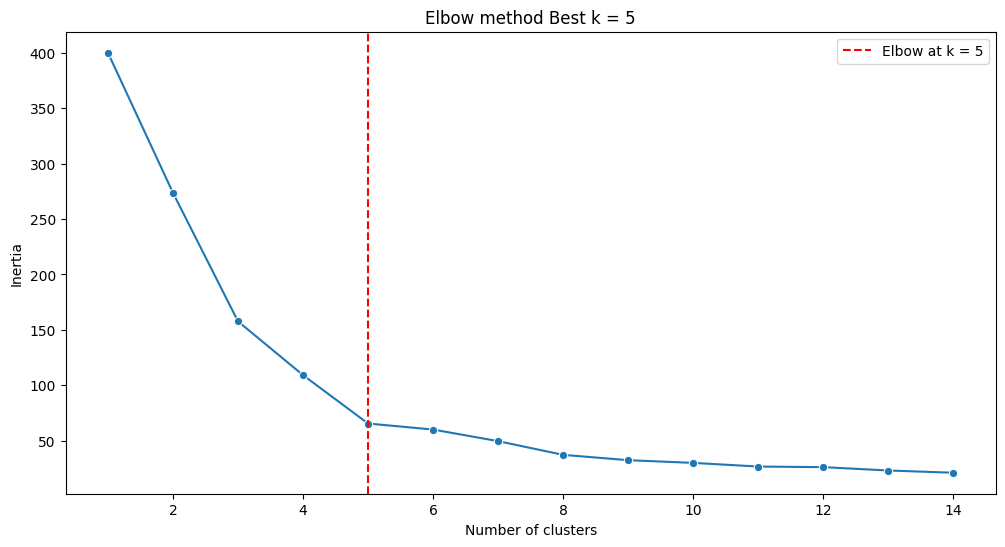

In [20]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=K, y=inertias, marker="o")
plt.axvline(x=best_k, color="red", linestyle="--", label=f"Elbow at k = {best_k}")
plt.title(f"Elbow method Best k = {best_k}")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.legend()
plt.show()

## Step 6 - Build the models


### KMeans clustering

In [21]:
best_k

np.int64(5)

In [22]:
best_kmeans = KMeans(n_clusters=best_k, random_state=42)
labels1 = best_kmeans.fit_predict(X_pre)
labels1

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

In [23]:
X1 = X.copy()
X1.head()

,Income,Spending
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [24]:
X1["labels"] = labels1

In [25]:
X1.head()

,Income,Spending,labels
0,15,39,4
1,15,81,2
2,16,6,4
3,16,77,2
4,17,40,4


In [26]:
for i in range(best_k):
    print(f"Cluster : {i}")
    display(X1.query(f"labels == {i}"))
    print("\n==============================================\n")

Cluster : 0


,Income,Spending,labels
43,39,61,0
46,40,55,0
47,40,47,0
48,40,42,0
49,40,42,0
...,...,...,...
121,67,40,0
122,69,58,0
126,71,35,0
132,72,34,0




Cluster : 1


,Income,Spending,labels
123,69,91,1
125,70,77,1
127,71,95,1
129,71,75,1
131,71,75,1
133,72,71,1
135,73,88,1
137,73,73,1
139,74,72,1
141,75,93,1




Cluster : 2


,Income,Spending,labels
1,15,81,2
3,16,77,2
5,17,76,2
7,18,94,2
9,19,72,2
11,19,99,2
13,20,77,2
15,20,79,2
17,21,66,2
19,23,98,2




Cluster : 3


,Income,Spending,labels
124,70,29,3
128,71,11,3
130,71,9,3
134,73,5,3
136,73,7,3
138,74,10,3
140,75,5,3
144,77,12,3
146,77,36,3
148,78,22,3




Cluster : 4


,Income,Spending,labels
0,15,39,4
2,16,6,4
4,17,40,4
6,18,6,4
8,19,3,4
10,19,14,4
12,20,15,4
14,20,13,4
16,21,35,4
18,23,29,4


In [27]:
centroids1 = X1.groupby(by="labels").mean()
centroids1

,Income,Spending
labels,,
0,55.296296,49.518519
1,86.538462,82.128205
2,25.727273,79.363636
3,88.200000,17.114286
4,26.304348,20.913043


## Plot data after clustering

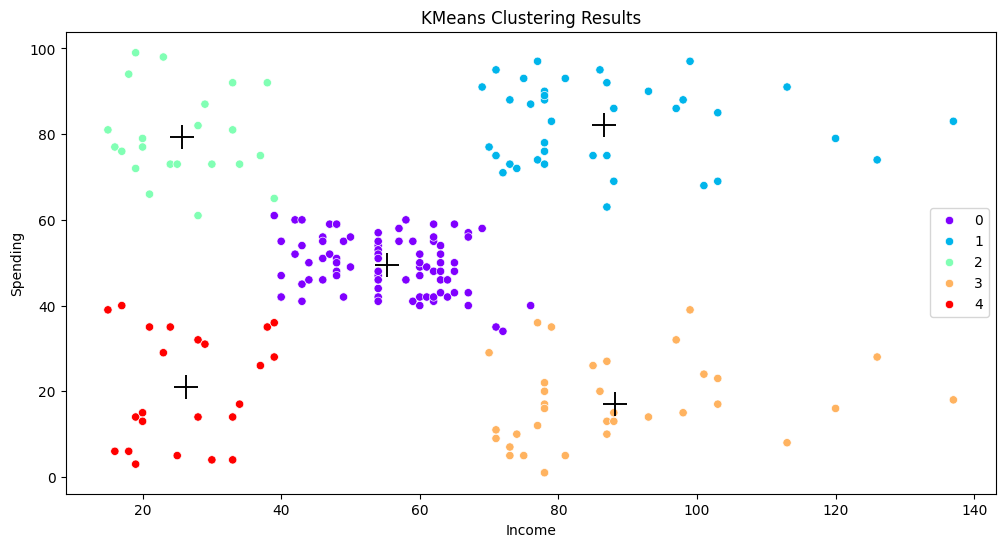

In [28]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=X1, x="Income", y="Spending", hue="labels", palette="rainbow")
sns.scatterplot(
    data=centroids1, x="Income", y="Spending", color="black", marker="+", s=300
)
plt.title("KMeans Clustering Results")
plt.show()

## Agglomerative Clustering (Bottom up approach)

In [29]:
best_k

np.int64(5)

In [30]:
from sklearn.cluster import AgglomerativeClustering

agc_model = AgglomerativeClustering(n_clusters=best_k)
labels2 = agc_model.fit_predict(X_pre)
labels2

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 0, 1, 0, 1,
       2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1])

In [31]:
X2 = X.copy()
X2.head()

,Income,Spending
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [32]:
X2["labels"] = labels2
X2.head()

,Income,Spending,labels
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4


In [33]:
for i in range(best_k):
    print(f"Cluster number : {i}")
    display(X2.query(f"labels == {i}"))
    print("\n======================================\n")

Cluster number : 0


,Income,Spending,labels
128,71,11,0
130,71,9,0
134,73,5,0
136,73,7,0
138,74,10,0
140,75,5,0
144,77,12,0
148,78,22,0
150,78,17,0
152,78,20,0




Cluster number : 1


,Income,Spending,labels
123,69,91,1
125,70,77,1
127,71,95,1
129,71,75,1
131,71,75,1
133,72,71,1
135,73,88,1
137,73,73,1
139,74,72,1
141,75,93,1




Cluster number : 2


,Income,Spending,labels
43,39,61,2
45,39,65,2
46,40,55,2
47,40,47,2
48,40,42,2
...,...,...,...
126,71,35,2
132,72,34,2
142,76,40,2
146,77,36,2




Cluster number : 3


,Income,Spending,labels
1,15,81,3
3,16,77,3
5,17,76,3
7,18,94,3
9,19,72,3
11,19,99,3
13,20,77,3
15,20,79,3
17,21,66,3
19,23,98,3




Cluster number : 4


,Income,Spending,labels
0,15,39,4
2,16,6,4
4,17,40,4
6,18,6,4
8,19,3,4
10,19,14,4
12,20,15,4
14,20,13,4
16,21,35,4
18,23,29,4


In [34]:
centroids2 = X2.groupby(by="labels").mean()
centroids2

,Income,Spending
labels,,
0,89.406250,15.593750
1,86.538462,82.128205
2,55.811765,49.129412
3,25.095238,80.047619
4,26.304348,20.913043


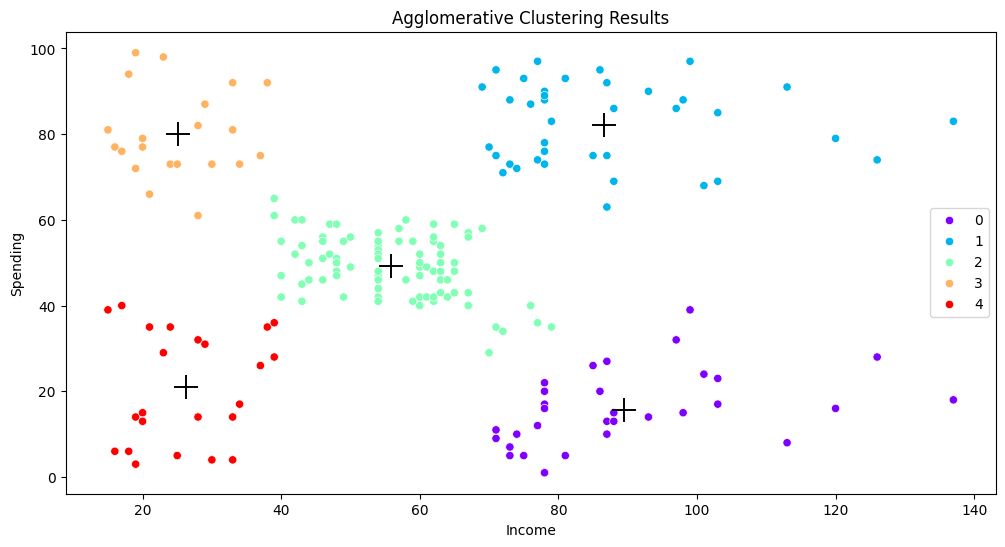

In [35]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=X2, x="Income", y="Spending", hue="labels", palette="rainbow")
sns.scatterplot(
    data=centroids2, x="Income", y="Spending", color="black", marker="+", s=300
)
plt.title("Agglomerative Clustering Results")
plt.show()